# VCGC: Vertex Coloring with Grover's Circuit 
Rudimentary Curcuit To Run Grover's Search Algorithm for a vertex coloring instance on the AER simulator and IBM's Quantum Computer. 

1. Prepare the circuit and add the uniform state preparation operator.

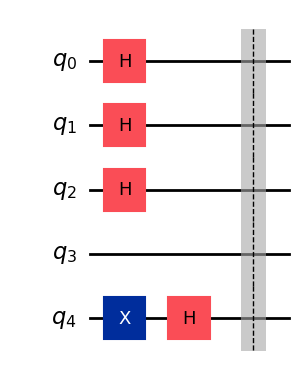

In [2]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np  

# Create a Quantum Circuit acting on a quantum register of 5 qubits
qc = QuantumCircuit(5)

# Subcircuit for uniform state preparation operator
spo = QuantumCircuit(3,name="state_prep")

# Add a H gate on all qubits except the last one
# This will give the superposition of all the qubits except the last one
for qubit in range(3):
    spo.h(qubit)
qc.append(spo, [0, 1, 2])
qc.x(4)
qc.h(4)
qc.barrier()

qc_decomposed : QuantumCircuit = qc.decompose(gates_to_decompose="state_prep")
qc_decomposed.draw('mpl')

2. Manually creating the oracle circuit for evaulating the scaled down vertex coloring problem shown below

![Simple Vertex Coloring problem](vertex_coloring_instance.png)

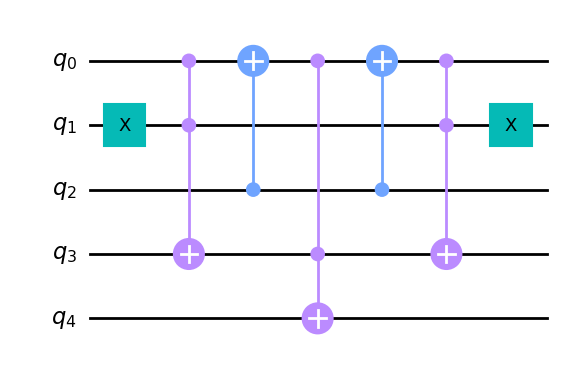

In [6]:
grover_oracle = QuantumCircuit(5, name="grover_oracle")
grover_oracle.x(1)
grover_oracle.ccx(0,1,3)
grover_oracle.cx(2,0)
grover_oracle.ccx(0,3,4)
grover_oracle.cx(2,0)
grover_oracle.ccx(0,1,3)
grover_oracle.x(1)

grover_oracle.draw('mpl',style='clifford')
